#### **Exercise - Investigate Trending skills**

**Importing the data**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import ast

**Loading the data**

In [2]:
df = pd.read_csv('D:\\python Programming\\DataSets\\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

**Performing some changes in the dataset**

In [3]:
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)
df['job_posted_month'] = pd.to_datetime(df['job_posted_date']).dt.month

In [4]:
df_de = df[df['job_title_short'] == "Data Engineer"].copy()

In [5]:
df_de_explode = df_de.explode('job_skills')

**Creating a pivot table for grouping the job posted month with job skills with its count(size) and filling the nan values with 0**

In [6]:
df_de_explode_pivot= df_de_explode.pivot_table(index = 'job_posted_month' ,columns='job_skills',aggfunc='size',fill_value=0)

In [7]:
df_de_explode_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,2897,3,263,175,8,400,0,4,16,37,...,5,371,10,432,0,0,1,0,151,59
2,2132,2,195,112,6,313,0,4,8,30,...,5,319,7,321,0,0,1,5,103,33
3,2187,5,205,92,7,340,3,4,8,19,...,6,270,8,328,0,1,0,0,124,29
4,2162,4,179,158,2,298,2,1,6,19,...,5,252,6,261,0,0,0,2,97,21
5,1988,1,167,153,3,272,0,4,7,9,...,1,232,5,233,0,0,0,1,93,23
6,2254,3,235,141,5,320,3,0,8,20,...,4,274,11,275,1,0,3,0,100,28
7,2015,9,208,99,0,268,0,0,9,18,...,7,302,6,246,2,0,0,0,76,28
8,2111,16,201,127,1,278,2,6,4,25,...,2,312,9,272,1,0,1,0,121,23
9,1812,5,186,91,4,259,1,2,4,13,...,3,276,9,256,0,0,4,1,101,20


In [8]:
df_de_explode_pivot.loc['Total'] = df_de_explode_pivot.sum()

In [9]:
df_de_explode_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,2897,3,263,175,8,400,0,4,16,37,...,5,371,10,432,0,0,1,0,151,59
2,2132,2,195,112,6,313,0,4,8,30,...,5,319,7,321,0,0,1,5,103,33
3,2187,5,205,92,7,340,3,4,8,19,...,6,270,8,328,0,1,0,0,124,29
4,2162,4,179,158,2,298,2,1,6,19,...,5,252,6,261,0,0,0,2,97,21
5,1988,1,167,153,3,272,0,4,7,9,...,1,232,5,233,0,0,0,1,93,23
6,2254,3,235,141,5,320,3,0,8,20,...,4,274,11,275,1,0,3,0,100,28
7,2015,9,208,99,0,268,0,0,9,18,...,7,302,6,246,2,0,0,0,76,28
8,2111,16,201,127,1,278,2,6,4,25,...,2,312,9,272,1,0,1,0,121,23
9,1812,5,186,91,4,259,1,2,4,13,...,3,276,9,256,0,0,4,1,101,20


In [10]:
df_de_explode_pivot = df_de_explode_pivot[df_de_explode_pivot.loc['Total'].sort_values(ascending=False).index].copy()

**Dropping the colunm**

In [11]:
df_de_explode_pivot.drop('Total',inplace=True)

In [12]:
df_de_explode_pivot

job_skills,sql,python,aws,azure,spark,java,kafka,hadoop,scala,databricks,...,shogun,fastify,workfront,dlib,ember.js,homebrew,asp.netcore,linode,chainer,dingtalk
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,12987,12426,6924,7138,6567,4246,3687,3533,3517,3002,...,2,0,0,0,0,0,0,0,0,0
2,9792,9378,5446,5278,4948,3300,2809,2774,2625,2272,...,1,0,0,0,0,0,0,0,0,0
3,9831,9410,5580,5283,4764,3223,2689,2592,2621,2378,...,0,0,0,0,0,0,0,0,0,0
4,8975,8670,5012,4901,4316,2931,2329,2340,2373,2170,...,0,0,0,0,0,3,0,0,1,0
5,8411,8169,4768,4466,3991,2725,2166,2195,2132,2034,...,0,0,0,0,0,0,1,0,0,0
6,9713,9216,5280,5091,4654,3092,2516,2468,2464,2317,...,0,0,1,0,0,0,0,0,0,0
7,9032,8493,5015,4857,4044,2757,2296,2235,2213,2161,...,0,0,2,2,0,0,0,0,0,0
8,9565,9016,5330,5070,4436,2961,2468,2421,2427,2310,...,0,0,1,0,0,0,1,0,0,0
9,8663,8213,4612,4646,3902,2584,2088,2024,2070,2198,...,1,0,0,0,0,0,0,1,0,0


<Axes: xlabel='job_posted_month'>

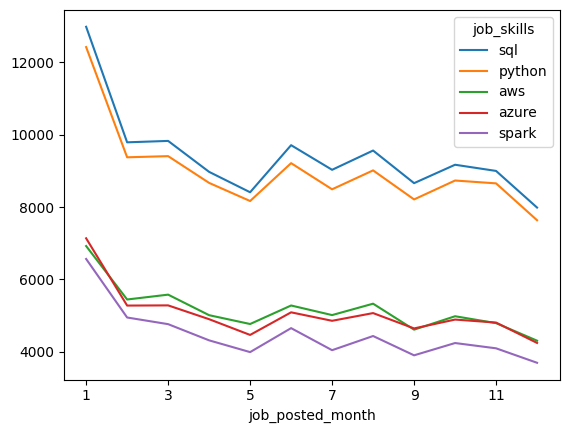

In [13]:
df_de_explode_pivot.iloc[:,:5].plot(kind = 'line')

Now lets convert the number of the month into the name of the month

In [14]:
df_de_explode_pivot.reset_index(inplace=True)

In [18]:
df_de_explode_pivot['job_posted_month_name'] = pd.to_datetime(df_de_explode_pivot['job_posted_month'],format = '%m').dt.strftime('%B') 

In [ ]:
df_de_explode_pivot.set_index('job_posted_month_name',inplace=True)

In [22]:
df_de_explode_pivot.drop(columns='job_posted_month')

job_skills,sql,python,aws,azure,spark,java,kafka,hadoop,scala,databricks,...,shogun,fastify,workfront,dlib,ember.js,homebrew,asp.netcore,linode,chainer,dingtalk
job_posted_month_name,,,,,,,,,,,,,,,,,,,,,
January,12987,12426,6924,7138,6567,4246,3687,3533,3517,3002,...,2,0,0,0,0,0,0,0,0,0
February,9792,9378,5446,5278,4948,3300,2809,2774,2625,2272,...,1,0,0,0,0,0,0,0,0,0
March,9831,9410,5580,5283,4764,3223,2689,2592,2621,2378,...,0,0,0,0,0,0,0,0,0,0
April,8975,8670,5012,4901,4316,2931,2329,2340,2373,2170,...,0,0,0,0,0,3,0,0,1,0
May,8411,8169,4768,4466,3991,2725,2166,2195,2132,2034,...,0,0,0,0,0,0,1,0,0,0
June,9713,9216,5280,5091,4654,3092,2516,2468,2464,2317,...,0,0,1,0,0,0,0,0,0,0
July,9032,8493,5015,4857,4044,2757,2296,2235,2213,2161,...,0,0,2,2,0,0,0,0,0,0
August,9565,9016,5330,5070,4436,2961,2468,2421,2427,2310,...,0,0,1,0,0,0,1,0,0,0
September,8663,8213,4612,4646,3902,2584,2088,2024,2070,2198,...,1,0,0,0,0,0,0,1,0,0


#### **Plotting it again**

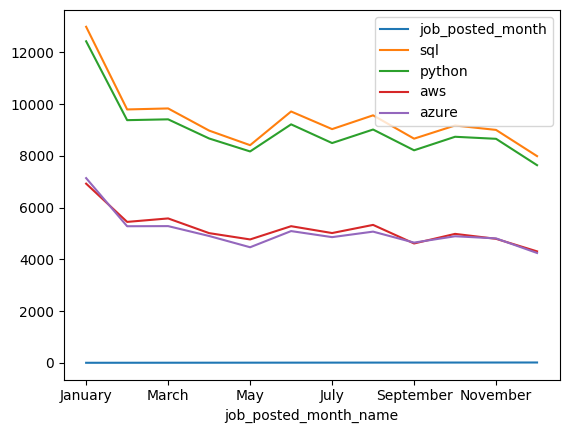

In [25]:
df_de_explode_pivot.iloc[:,:5].plot(kind = 'line')
plt.legend().set_loc('upper right')